In [4]:

import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_34b119806fea402f9123b0c7a69abf15 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='OfgMiv0Qr2fALlwQ0JEA1puJKetW4Gj5DVx7avWNekhv',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_34b119806fea402f9123b0c7a69abf15.get_object(Bucket='knnmnist-donotdelete-pr-b8njy8sqitxvtp',Key='train.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

train_df = pd.read_csv(body)
train_df.head()



,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:

body = client_34b119806fea402f9123b0c7a69abf15.get_object(Bucket='knnmnist-donotdelete-pr-b8njy8sqitxvtp',Key='test.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

test_df = pd.read_csv(body)
test_df.head()



,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [8]:

body = client_34b119806fea402f9123b0c7a69abf15.get_object(Bucket='knnmnist-donotdelete-pr-b8njy8sqitxvtp',Key='sample_submission.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

submission_binary = pd.read_csv(body)
submission_binary.head()
submission_combined = submission_binary
submission_chains = submission_binary



Percentage of unlabelled comments is  89.83211235124176
Total rows in test is 153164
Total rows in train is 159571
obscene           8449
insult            7877
toxic            15294
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


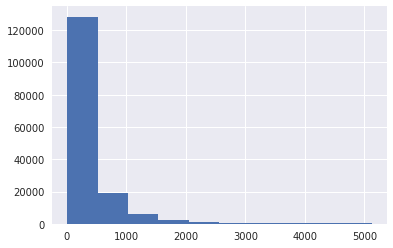

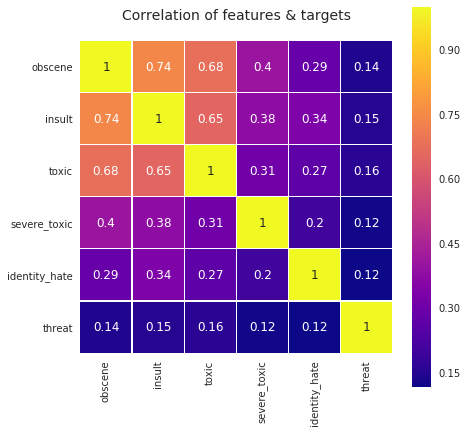

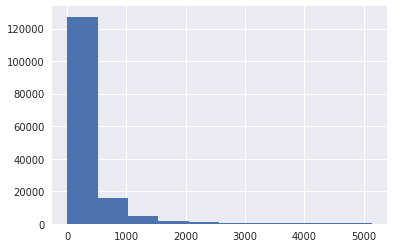

(159571,) (153164,)
... Processing obscene
Training accuracy is 0.9832300355327722
... Processing insult
Training accuracy is 0.9755469352200588
... Processing toxic
Training accuracy is 0.9639846839337975
... Processing severe_toxic
Training accuracy is 0.9920724943755445
... Processing identity_hate
Training accuracy is 0.9939713356436947
... Processing threat
Training accuracy is 0.9981199591404453
... Processing obscene
Training Accuracy is 0.9832300355327722
Shape of X_dtm is now (159571, 5001)
Shape of test_X_dtm is now (153164, 5001)
... Processing insult
Training Accuracy is 0.9819077401282188
Shape of X_dtm is now (159571, 5002)
Shape of test_X_dtm is now (153164, 5002)
... Processing toxic
Training Accuracy is 0.9676068959898728
Shape of X_dtm is now (159571, 5003)
Shape of test_X_dtm is now (153164, 5003)
... Processing severe_toxic
Training Accuracy is 0.9931002500454343
Shape of X_dtm is now (159571, 5004)
Shape of test_X_dtm is now (153164, 5004)
... Processing identity_h

In [9]:

# coding: utf-8

# In[1]:


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
get_ipython().magic(u'matplotlib inline')
import seaborn as sns
import re


# In[11]:


# Manually delete some line break arround record "4720e1b85a18e0a1", in comment_text to avoid parsing and string-to-float convert error
#train_df = pd.read_csv('data/toxique_comment/train.csv', error_bad_lines=False, low_memory=False, dtype={"id": str,"comment_text":str,"toxic":float,"severe_toxic":float,"obscene":float,"threat":float,"insult":float,"identity_hate":float})
#test_df = pd.read_csv('data/toxique_comment/test.csv')


# In[12]:


train_df.sample(5)


# In[14]:


cols_target = ['obscene','insult','toxic','severe_toxic','identity_hate','threat']
# check missing values in numeric columns
train_df.describe()


# In[15]:


unlabelled_in_all = train_df[(train_df['toxic']!=1) & (train_df['severe_toxic']!=1) & (train_df['obscene']!=1) & 
                            (train_df['threat']!=1) & (train_df['insult']!=1) & (train_df['identity_hate']!=1)]
print('Percentage of unlabelled comments is ', len(unlabelled_in_all)/len(train_df)*100)


# In[16]:


# check for any 'null' comment
no_comment = train_df[train_df['comment_text'].isnull()]
len(no_comment)


# In[17]:


test_df.head()


# In[18]:


no_comment = test_df[test_df['comment_text'].isnull()]
no_comment


# In[19]:


# let's see the total rows in train, test data and the numbers for the various categories
print('Total rows in test is {}'.format(len(test_df)))
print('Total rows in train is {}'.format(len(train_df)))
print(train_df[cols_target].sum())


# In[20]:


# Let's look at the character length for the rows in the training data and record these
train_df['char_length'] = train_df['comment_text'].apply(lambda x: len(str(x)))


# In[21]:


# look at the histogram plot for text length
sns.set()
train_df['char_length'].hist()
plt.show()


# In[22]:


data = train_df[cols_target]


# In[23]:


colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)


# In[24]:


test_df['char_length'] = test_df['comment_text'].apply(lambda x: len(str(x)))


# In[25]:


plt.figure()
plt.hist(test_df['char_length'])
plt.show()


# In[26]:


# Clean the comment text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text


# In[27]:


# clean the comment_text in train_df [Thanks to Pulkit Jha for the useful pointer.]
train_df['comment_text'] = train_df['comment_text'].map(lambda com : clean_text(com))


# In[28]:


# clean the comment_text in test_df [Thanks, Pulkit Jha.]
test_df['comment_text'] = test_df['comment_text'].map(lambda com : clean_text(com))


# In[29]:


train_df = train_df.drop('char_length',axis=1)


# In[30]:


X = train_df.comment_text
test_X = test_df.comment_text


# In[31]:


print(X.shape, test_X.shape)


# In[32]:


# import and instantiate TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(max_features=5000,stop_words='english')
vect


# In[33]:


# learn the vocabulary in the training data, then use it to create a document-term matrix
X_dtm = vect.fit_transform(X)
# examine the document-term matrix created from X_train
X_dtm


# In[34]:


# transform the test data using the earlier fitted vocabulary, into a document-term matrix
test_X_dtm = vect.transform(test_X)
# examine the document-term matrix from X_test
test_X_dtm


# In[37]:


# import and instantiate the Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
logreg = LogisticRegression(C=12.0)

# create submission file
#submission_binary = pd.read_csv('data/toxique_comment/sample_submission.csv')

for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm, y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(accuracy_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    submission_binary[label] = test_y_prob


# In[38]:


submission_binary.head()


# In[42]:


# generate submission file
submission_binary.to_csv('submission_binary.csv',index=False)


# In[44]:


# create submission file
#submission_chains = pd.read_csv('data/toxique_comment/sample_submission.csv')

# create a function to add features
def add_feature(X, feature_to_add):
    '''
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    '''
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')


# In[45]:


for label in cols_target:
    print('... Processing {}'.format(label))
    y = train_df[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm,y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training Accuracy is {}'.format(accuracy_score(y,y_pred_X)))
    # make predictions from test_X
    test_y = logreg.predict(test_X_dtm)
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    submission_chains[label] = test_y_prob
    # chain current label to X_dtm
    X_dtm = add_feature(X_dtm, y)
    print('Shape of X_dtm is now {}'.format(X_dtm.shape))
    # chain current label predictions to test_X_dtm
    test_X_dtm = add_feature(test_X_dtm, test_y)
    print('Shape of test_X_dtm is now {}'.format(test_X_dtm.shape))


# In[46]:


submission_chains.head()


# In[48]:


# generate submission file
submission_chains.to_csv('submission_chains.csv', index=False)


# In[49]:


# create submission file
#submission_combined = pd.read_csv('sample_submission.csv')


# In[50]:


# corr_targets = ['obscene','insult','toxic']
for label in cols_target:
    submission_combined[label] = 0.5*(submission_chains[label]+submission_binary[label])


# In[51]:


submission_combined.head()


# In[52]:


# generate submission file
submission_combined.to_csv('submission_combined.csv', index=False)

